# Exercise 3

Consider the following boundary value problem (BVP):

\begin{gather*}
	- u^{\prime \prime}(x) - 4 u^{\prime } (x) + u(x) = f(x) \qquad  \text{for} \; x \in \Omega := (0,1),\\
	u(0) = 1 \quad \text{and} \quad  u(1) = 2 
\end{gather*}

Let us assume that the exact solution is given by $u(x) = 1 + 4x^2 - 3x^3$. We want to solve this problem
via FDM. For some integer $p \in \mathbb{R}$ with $p > 1$ let $N := 2^p - 1 \in \mathbb{R}$ and the grid size
$h := \frac{1}{ N +1}$ be given. Then, our discrete domain is $\Omega_h := \left\{ i h \in \mathbb{R} : i = 0, . . . , N + 1\right\}$.


### Part a)

Write a function getbvp(p) that, for a given $p$, sets up the grid $x_h$, the sparse matrix $L_h$, and the right hand side $f_h$ and returns all of them as a list/tuple $(x_h,L_h,f_h)$.

In [4]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import math
def getbvp( p ):
    #initial values for the BVP 
    alpha=1
    beta=2
    
    a=1
    b=-4
    c=1
    
    # Setting the vector xh as {h,2h,...,Nh} without the boundary 
    N=2**p -1  # number of meshigrids
    h=1/(N+1)  # step size
    omega_h_bara=np.array([i*h for i in range(N+2)])
    xh=np.delete(omega_h_bara,[0,N+1])
    
    
    #defining the tridiagonal Matrixes and then multiplie them by their corresponding coefficients 
    k1=[np.ones(N-1),-2*np.ones(N),np.ones(N-1)]
    offset=[-1,0,1]
    L1=sp.diags(k1,offset).toarray()
    
    
    k2=[-1*np.ones(N-1),np.zeros(N),np.ones(N-1)]
    L2=sp.diags(k2,offset).toarray()
    
    L3=sp.diags(np.ones(N)).toarray()
    
    #defining the L_h Matrix
    Lh=-(a/h**2)*L1 + (b/2*h)*L2 + c*L3
    
    #calculating the right hand side fh of the reduced problem
    fh=np.array([-7-14*x+40*(x**2)-3*(x**3) for x in xh])
    
    #inhomogeneity
    fh[0]=fh[0]+alpha*((a/h**2)+(b/2*h))
    fh[N-1]=fh[N-1]+beta*((a/h**2)-(b/2*h))
    
    return xh, Lh, fh


### Part b)

Consider the error between the numerical solution and the exact solution w.r.t the maximum norm, e.g 

\begin{gather*}
e(h) := \underset{i}{\max} | u_h(ih) - u(ih) |.
\end{gather*}

For $p = 1, \dots , 12$ solve the discretized problem and calculate the error $e(h)$. Plot the error $e(h)$ versus the grid size $h$ (and not $p$) in a log-log plot. 

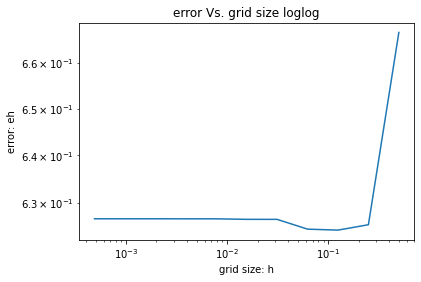

In [5]:
def err(h):
    
    #to use BVP function, we first need to get the value of p with the following formula
    p=int(math.log(1/h,2))
    s=getbvp(p)
    
    #to calculate the uh (the discertized approximation of U, we solve the liear system Lh*uh=fh)
    uh=np.linalg.solve(s[1], s[2])
    
    #the analytics soloutin to U as given 
    u=[1+4*(x**2)-3*(x**3) for x in s[0]]
    
    #The Error in Maximum Norm
    e=np.amax(abs(uh-u))
    
    return e

#Computing Error for p=1,...,12
p = np.arange(1,12)
N = 2**p -1
h = 1/(N+1)
eh = [err(h1_12) for h1_12 in h]

# plot it here
plt.loglog(h,eh)
plt.title('error Vs. grid size loglog')
plt.xlabel('grid size: h')
plt.ylabel('error: eh')
plt.show()

### Part c)

Add the following functionality to your code from the last subtask. Consider the error between the numerical solution of mesh size $h$ (denoted by $u_h$ ) and of mesh size $\frac{h}{2}$ (denoted by $u_{h/2}$ ). For a sequence of deceasing $h$ values, compute the a-posteriori error

\begin{gather} 
\bar{e}_h := \underset{i}{\max} |u_h (ih) - u_{h/2} (ih) |.
\end{gather}

Plot the error in a logarithmic plot, but as a separate plot from the last subtask.
Plot the error $\bar{e}(h)$ versus the grid size $h$ (and again not $p$). 	

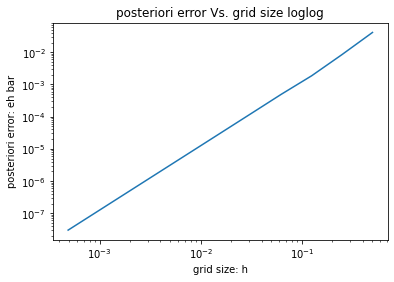

In [6]:
def err_post( h ):
    
    p1 =int(math.log(1/h,2))
    s1 = getbvp(p1)
    uh = np.linalg.solve(s1[1], s1[2])
    
    p2 =int(math.log(2/h,2))
    s2 = getbvp(p2)
    uh2 = np.linalg.solve(s2[1], s2[2])
    
    #since our step size is diffrent, uh and uh/2 do not have the same number of points so we have to compare the points in 
    #uh with only same points that we have in Uh/2

    ebar = np.amax(abs(uh-uh2[1::2]))
    
    return ebar

# plot it here

p = np.arange(1,12)
N = 2**p -1
h = 1/(N+1)
ehbar = [err_post(h1_12) for h1_12 in h]

# plot it here
plt.loglog(h,ehbar)
plt.title('posteriori error Vs. grid size loglog')
plt.xlabel('grid size: h')
plt.ylabel('posteriori error: eh bar')
plt.show()